<a href="https://colab.research.google.com/github/Suhani212605/Internship-Projects-/blob/main/Project3_Accident_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

       Collision_Ref_No Policing_Area  Collision_Severity  \
0                  3518          CREA                   3   
1                 10557          BELC                   3   
2                  5002          LISB                   3   
3                 11714          BELC                   3   
4                 12416          MIDU                   3   
...                 ...           ...                 ...   
10038              3535          LISB                   3   
10039             11675          ARND                   3   
10040              7222          ARND                   3   
10041             12320          BELC                   3   
10042             10757          NEMD                   3   

      Weekday_of_Collision  Day_of_Collision  Month_of_Collision  \
0                      MON                 4                   8   
1                      SAT                 8                   8   
2                      WED                 5                  1

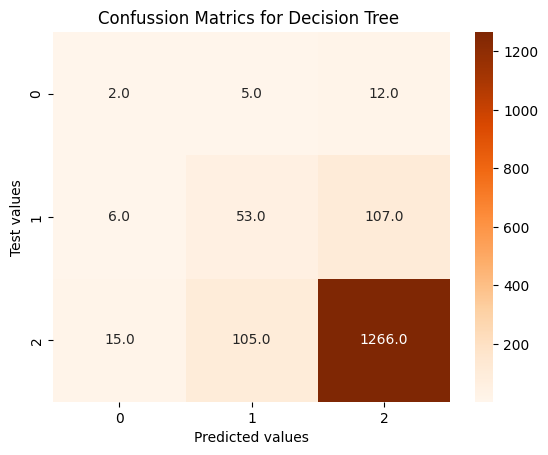

[0.82188295 0.85114504 0.84585987 0.8522293  0.85987261 0.84840764
 0.85859873 0.86242038 0.84713376 0.84840764]
0.8520145540590913


In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df=pd.read_csv('/content/sample_data/Accident_train.csv')
print(df)
for i in range(17):
  print("The number of null values of columns ",i," is :")
  nullCheck=df.iloc[:,i].isnull().sum()
  print(nullCheck)
df=df.dropna()
print(df)
#to check if there is null values
for i in range(17):
  print("The number of null values of columns ",i," is :")
  nullCheck=df.iloc[:,i].isnull().sum()
  print(nullCheck)
df.Hour_of_Collision.unique()
df.reset_index(drop=True)
print(df)
dummies1=pd.get_dummies(df['Weekday_of_Collision']).astype(int)
print(dummies1)
dummies2=pd.get_dummies(df['Policing_Area']).astype(int)
print(dummies2)
df=df.drop(['Weekday_of_Collision','Policing_Area'],axis='columns')
df=pd.concat([df,dummies1,dummies2],axis='columns')
print(df)
Y=df['Collision_Severity']
Y.unique()
X=df.drop(['Collision_Severity','Collision_Ref_No'],axis='columns')
print(X)
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.8)
print(X_train)
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)
Y_predicted=dt.predict(X_test)
print(Y_predicted)
print("First 5 predicted values : ")
print(Y_predicted[0:5])
print("First 5 test value : ")
print(np.array(Y_test[0:5]))
print(dt.score(X_test,Y_test))
from sklearn import metrics
matrix=metrics.confusion_matrix(Y_test,Y_predicted)
print(matrix)
sns.heatmap(matrix,annot=True,cmap="Oranges",fmt='0.1f')
plt.xlabel("Predicted values")
plt.ylabel("Test values")
plt.title("Confussion Matrics for Decision Tree ")
plt.show()
from sklearn.model_selection import cross_val_score
dt.fit(X,Y)
print(cross_val_score(dt,X,Y,cv=10))
print(np.average(cross_val_score(dt,X,Y,cv=10)))